Импортирование библиотек и загрузка данных

In [98]:
import pandas as pd # Анализ данных
import numpy as np  # Поддержка многомерных массивов
from sklearn import preprocessing
import matplotlib.pyplot as plt # Интерфейс визуализаций
import matplotlib.ticker as ticker
import seaborn as sns

In [99]:
df = pd.read_csv("main3.csv") # Загрузка датасета

In [100]:
df.head(10) # Проверка загрузки датасета, вывод первых 10-ти записей

,author,author_type,url,location,floor,floors_count,rooms_count,total_meters,price,year_of_construction,house_material_type,finish_type,living_meters,kitchen_meters,phone,district,street,house_number,underground
0,Метражи group,real_estate_agent,https://www.cian.ru/sale/flat/308167237/,Москва,5.0,7.0,1.0,34.6,9000000.0,1978,NaN,NaN,18 м²,8 м²,7.985041e+10,Северное Измайлово,15-я Парковая,54,Щёлковская
1,ЛэндЛ,real_estate_agent,https://www.cian.ru/sale/flat/302263383/,Москва,14.0,45.0,1.0,41.3,12800000.0,2026,NaN,Без отделки,20 м²,11 м²,7.964559e+10,Нижегородский,Перовское шоссе,NaN,Нижегородская
2,Stenoy,developer,https://www.cian.ru/sale/flat/300878920/,Москва,10.0,12.0,1.0,34.4,19372498.0,2026,Монолитно-кирпичный,"Без отделки, черновая, чистовая","11,8 м²","11,7 м²",7.499716e+10,Преображенское,Электрозаводская,60,Преображенская площадь
3,Alliance Agency Real Estate,real_estate_agent,https://www.cian.ru/sale/flat/298254403/,Москва,4.0,33.0,1.0,42.9,23600000.0,NaN,NaN,NaN,"22,9 м²",15 м²,7.965188e+10,Останкинский,Годовикова,11к2,Алексеевская
4,Зиля Карамова,realtor,https://www.cian.ru/sale/flat/263316279/,Москва,1.0,16.0,1.0,37.7,9450000.0,1982,NaN,NaN,NaN,NaN,7.916094e+10,Чертаново Центральное,Варшавское шоссе,142К2,Пражская
5,STONE,developer,https://www.cian.ru/sale/flat/305914270/,Москва,2.0,24.0,1.0,32.6,16906360.0,2027,Монолитно-кирпичный,Без отделки,"18,8 м²",NaN,7.499706e+10,Сокольники,Гастелло,NaN,Сокольники
6,Омега-Эстейт,real_estate_agent,https://www.cian.ru/sale/flat/303983520/,Москва,13.0,17.0,1.0,37.6,11000000.0,2018,NaN,NaN,"17,6 м²",15 м²,7.985243e+10,NaN,Бачуринская,7к2,Бачуринская
7,MR Group,developer,https://www.cian.ru/sale/flat/308309936/,Москва,46.0,48.0,1.0,33.7,15478241.0,2027,Монолитно-кирпичный,"Без отделки, предчистовая","10,1 м²",NaN,7.495135e+10,Покровское-Стрешнево,NaN,NaN,Тушинская
8,Dream Realty,real_estate_agent,https://www.cian.ru/sale/flat/307043068/,Москва,9.0,28.0,1.0,34.7,14500000.0,2023,NaN,NaN,"9,1 м²","14,2 м²",7.915350e+10,Богородское,Открытое шоссе,14Д,Бульвар Рокоссовского
9,ASTERUS,developer,https://www.cian.ru/sale/flat/306225030/,Москва,2.0,18.0,1.0,34.8,15834000.0,2028,Монолитно-кирпичный,"Без отделки, предчистовая","11,7 м²",13 м²,7.495139e+10,Покровское-Стрешнево,NaN,NaN,Тушинская


Анализ данных

In [101]:
df.columns  # Просмотр столбцов (заголовков)

Index(['author', 'author_type', 'url', 'location', 'floor', 'floors_count',
       'rooms_count', 'total_meters', 'price', 'year_of_construction',
       'house_material_type', 'finish_type', 'living_meters', 'kitchen_meters',
       'phone', 'district', 'street', 'house_number', 'underground'],
      dtype='object')

In [102]:
df.info()   # Всего  в датасете 10582 строки и 19 колонок
# Из них - 13  категориальных и 6 с числовыми данными

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10582 entries, 0 to 10581
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   author                10411 non-null  object 
 1   author_type           10408 non-null  object 
 2   url                   10578 non-null  object 
 3   location              10174 non-null  object 
 4   floor                 10581 non-null  float64
 5   floors_count          10581 non-null  float64
 6   rooms_count           10509 non-null  float64
 7   total_meters          10581 non-null  float64
 8   price                 10548 non-null  float64
 9   year_of_construction  8367 non-null   object 
 10  house_material_type   1251 non-null   object 
 11  finish_type           1715 non-null   object 
 12  living_meters         8128 non-null   object 
 13  kitchen_meters        9046 non-null   object 
 14  phone                 10578 non-null  float64
 15  district           

In [103]:
df.describe()   #Узнаем информацию о числовых значениях

,floor,floors_count,rooms_count,total_meters,price,phone
count,10581.000000,10581.000000,10509.000000,10581.000000,1.054800e+04,1.057800e+04
mean,7.433135,13.666289,2.136645,66.496395,2.727024e+07,7.883500e+10
std,7.213998,10.196828,1.216315,53.504381,7.383366e+07,1.614022e+09
min,1.000000,1.000000,1.000000,10.000000,7.000000e+05,7.494255e+10
25%,3.000000,5.000000,1.000000,37.500000,5.800000e+06,7.910487e+10
50%,5.000000,11.000000,2.000000,48.800000,8.580000e+06,7.963719e+10
75%,10.000000,17.000000,3.000000,73.000000,1.550000e+07,7.966061e+10
max,82.000000,95.000000,5.000000,663.000000,1.392320e+09,7.989856e+10


Просмотр и работа с выбросами, пропущенными данными и дубликатами

In [104]:
df = df.dropna(subset='price')  # Удаление записей где не указана цена
df = df.dropna(subset='total_meters')  # Удаление записей где не указана площадь квартиры

df['price_of_meter'] = df['price'] / df['total_meters'] # Добавление нового столбца - цена за метр квадратный

<Axes: >

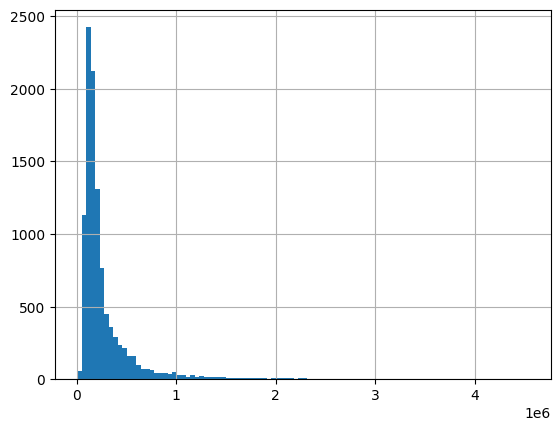

In [105]:
# Обнаружение выбросов в столбце price_of_meters
df['price_of_meter'].hist(bins=100) # Вывод информации по ключевому столбцу - цена за метр квадратный
# Посмотрев на график заметных выбросов по столбцу цена за метр не видно

In [106]:
df['price_of_meter'].describe().round(2)

count      10548.00
mean      277969.60
std       317094.60
min         7107.32
25%       124287.59
50%       176000.00
75%       289213.32
max      4537521.82
Name: price_of_meter, dtype: float64

<Axes: >

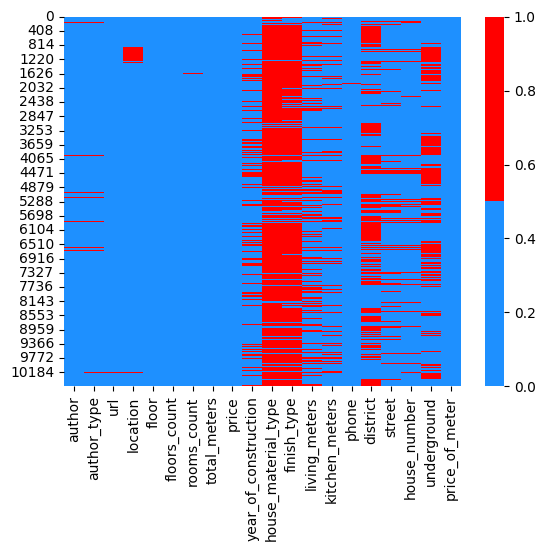

In [107]:
# Тепловая карта пропущенных значений
cols = df.columns # Все столбцы

# красный цвет - пропущенные данные, синий - не пропущенные
colours = ['#1E90FF', '#FF0000'] 
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

# Больше всего пропусков наблюдается в столбцах house_material_type и finish_type

In [108]:
# Процентный список пропущенных данных
for col in df.columns:
    pct_missing = float(np.mean(df[col].isnull()))
    print(f'{col} - {round(pct_missing * 100, 2)}%')
    
# Больше всего пропусков наблюдается в столбцах материала дома(house_material_type) - 88% и отделка(finish_type) - 84%

author - 1.61%
author_type - 1.64%
url - 0.03%
location - 3.86%
floor - 0.0%
floors_count - 0.0%
rooms_count - 0.68%
total_meters - 0.0%
price - 0.0%
year_of_construction - 20.99%
house_material_type - 88.42%
finish_type - 84.05%
living_meters - 23.23%
kitchen_meters - 14.32%
phone - 0.03%
district - 43.5%
street - 13.94%
house_number - 10.59%
underground - 37.01%
price_of_meter - 0.0%


In [109]:
# Удаляем столбцы, где пропущено более 75% данных (house_material_type, finish_type)

for col in df.columns:
    pct_missing = float(np.mean(df[col].isnull())) * 100    # Среднее число пропусков в процентах
    if pct_missing > 75:
        df.drop(columns=col, inplace=True)

In [110]:
df.drop(columns='url', inplace=True)    #Удаляем столбец url, так как он нам не особо нужен

In [111]:
df = df.dropna(subset=['location']) # Удаляем записи с пропусками в столбце локация, улица
df = df.dropna(subset=['street'])   # т.к. объявления не несут смысла без наличия адреса квартиры (город, улица)

In [112]:
# Конвертация столбца год_постройки в числовой тип
df['year_of_construction'] = pd.to_numeric(df['year_of_construction'], errors='coerce')

# Удаление записей, где year_of_construction > 2024 или < 1924
df = df[(df['year_of_construction'] <= 2024) & (df['year_of_construction'] >= 1924)]

In [113]:
df = df.drop_duplicates()   # Удаление записей дубликатов

In [114]:
# Замена пропусков в столбце метро (underground), район (district), номер дома (house_number) на _MISSING_.
# Не удаляем т.к. это не особо важные столбцы и записи при пустом значении остаются ценными
df['underground'] = df['underground'].fillna('_MISSING_')
df['district'] = df['district'].fillna('_MISSING_')
df['house_number'] = df['house_number'].fillna('_MISSING_')

In [115]:
# Убираем в столбцах жилая_площадь и кухонная_площадь 'м²' и конвертируем в числовой формат

df['living_meters'] = df['living_meters'].str.replace("\xa0м²", "").str.replace(",", ".").astype(float)
df['kitchen_meters'] = df['kitchen_meters'].str.replace("\xa0м²", "").str.replace(",", ".").astype(float)

# Заменяем пропуски в столбцах средними значениями

df['living_meters'] = df['living_meters'].fillna(df['living_meters'].mean())
df['kitchen_meters'] = df['kitchen_meters'].fillna(df['kitchen_meters'].mean())

<Axes: >

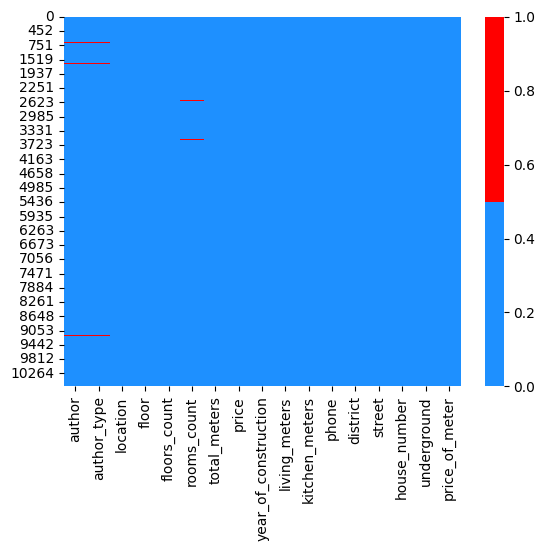

In [116]:
# Обновленная тепловая карта пропущенных значений
cols = df.columns # Все столбцы

# красный цвет - пропущенные данные, синий - не пропущенные
colours = ['#1E90FF', '#FF0000'] 
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

# Посмотрев на график видно что пропусков практически нет

In [117]:
# Обновлённый список пропущенных данных
for col in df.columns:
    pct_missing = float(np.mean(df[col].isnull()))
    print(f'{col} - {round(pct_missing * 100, 2)}%')

author - 0.72%
author_type - 0.72%
location - 0.0%
floor - 0.0%
floors_count - 0.0%
rooms_count - 0.78%
total_meters - 0.0%
price - 0.0%
year_of_construction - 0.0%
living_meters - 0.0%
kitchen_meters - 0.0%
phone - 0.03%
district - 0.0%
street - 0.0%
house_number - 0.0%
underground - 0.0%
price_of_meter - 0.0%


In [118]:
# Вывод информации о количестве записей и столбцов
df.info()   # Можно заметить количество столбцов и записей уменьшилось
# Были удалены столбцы с пропусками, записи с важными пропущенными значениями и дубликаты записей

<class 'pandas.core.frame.DataFrame'>
Index: 6375 entries, 0 to 10581
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   author                6329 non-null   object 
 1   author_type           6329 non-null   object 
 2   location              6375 non-null   object 
 3   floor                 6375 non-null   float64
 4   floors_count          6375 non-null   float64
 5   rooms_count           6325 non-null   float64
 6   total_meters          6375 non-null   float64
 7   price                 6375 non-null   float64
 8   year_of_construction  6375 non-null   float64
 9   living_meters         6375 non-null   float64
 10  kitchen_meters        6375 non-null   float64
 11  phone                 6373 non-null   float64
 12  district              6375 non-null   object 
 13  street                6375 non-null   object 
 14  house_number          6375 non-null   object 
 15  underground           637

Диаграммы

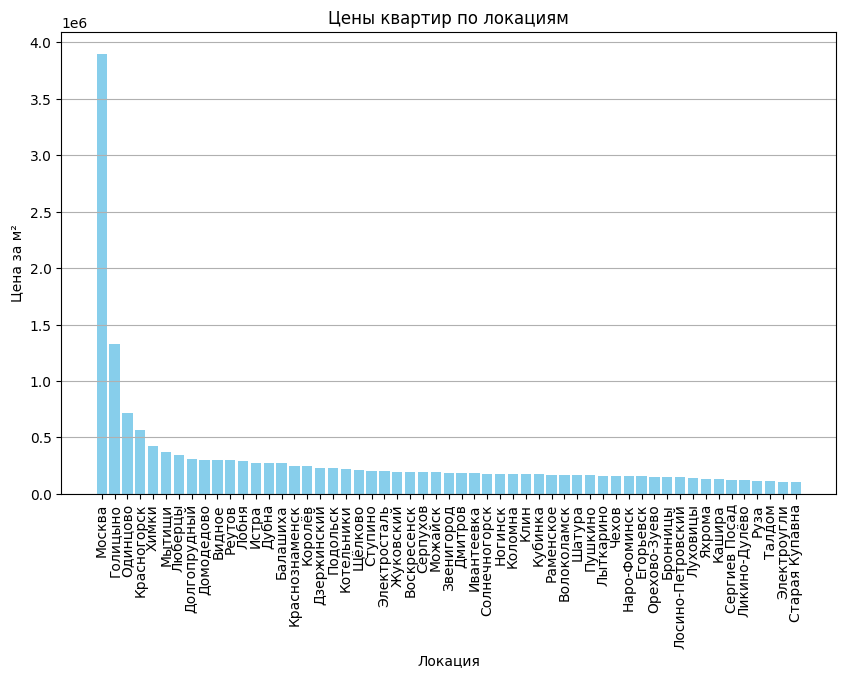

In [119]:
# Цены квартир по локациям

# Сортируем данные по цене
df_sorted = df.sort_values(by='price_of_meter', ascending=False)

# Создаем столбчатую диаграмму
plt.figure(figsize=(10, 6))
plt.bar(df_sorted['location'], df_sorted['price_of_meter'], color='skyblue')

# Добвляем заголовки и метки
plt.title('Цены квартир по локациям')
plt.xlabel('Локация')
plt.ylabel('Цена за м²')

plt.xticks(rotation=90) # Поворачиваем метки локаций
plt.grid(axis='y')  # Отображаем сетку для удобства по оси Y

# Показываем график
plt.show()

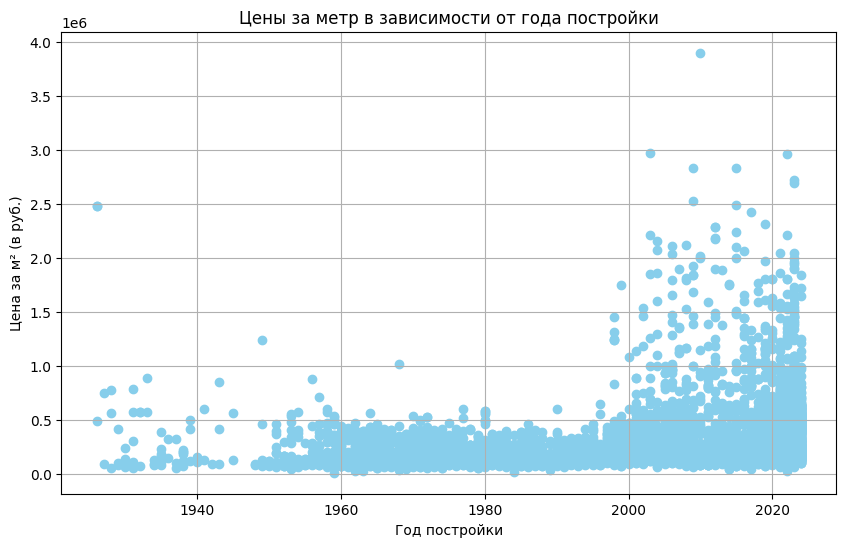

In [120]:
# Цены за метр в зависимости от года постройки

# Сортируем данные по году
df_sorted = df.sort_values(by='year_of_construction', ascending=False)

# Создаем точечный график
plt.figure(figsize=(10, 6))  # Размер графика
plt.scatter(df_sorted['year_of_construction'], df_sorted['price_of_meter'], color='skyblue')

# Добавляем заголовки и метки
plt.title('Цены за метр в зависимости от года постройки')
plt.xlabel('Год постройки')
plt.ylabel('Цена за м² (в руб.)')
plt.grid()  # Добавление сетки для удобства чтения

# Показываем график
plt.show()

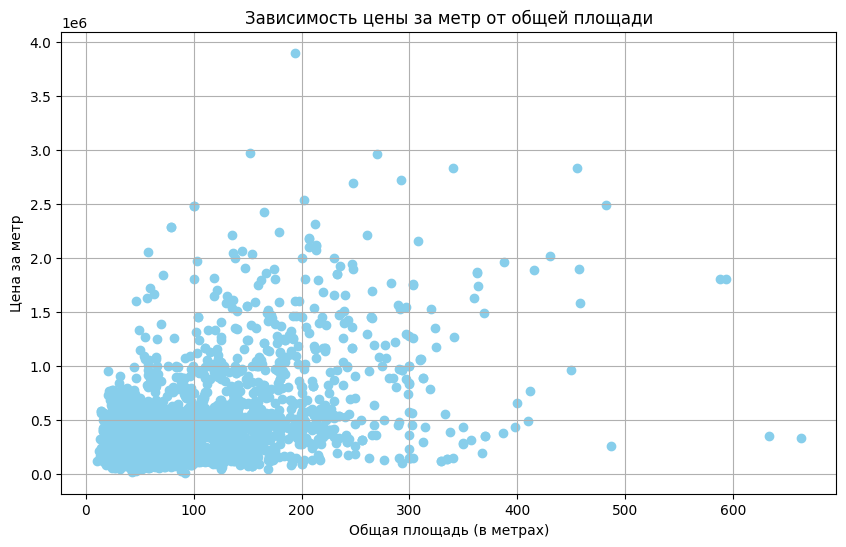

In [121]:
# Сортировка данных по цене за метр
df_sorted = df.sort_values(by='price_of_meter')

# Построение графика
plt.figure(figsize=(10, 6))
plt.scatter(df_sorted['total_meters'], df_sorted['price_of_meter'], color='skyblue')

#Добавляем заголовки и метки
plt.title('Зависимость цены за метр от общей площади')
plt.xlabel('Общая площадь (в метрах)')
plt.ylabel('Цена за метр')

plt.grid()  # Выводим сетку для удобства

plt.show()

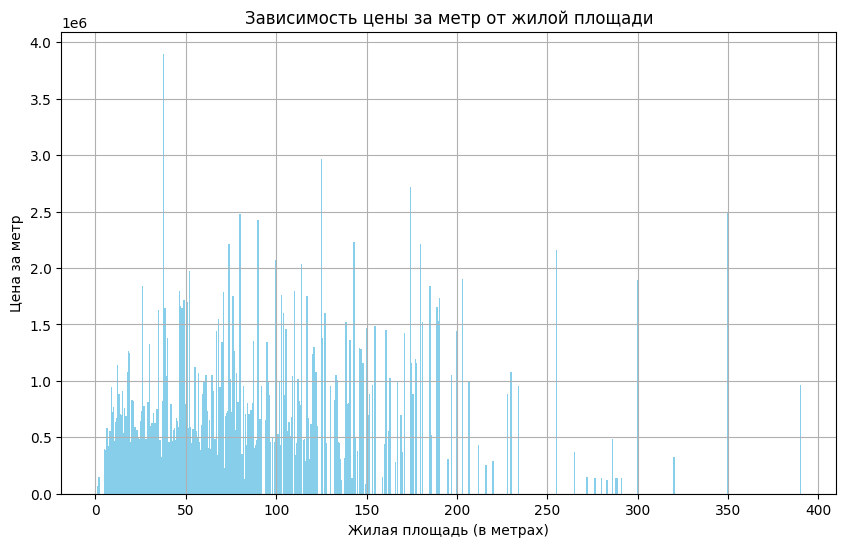

In [122]:
# Как жилая площадь вляет на цену за квадратный метр

# Построение графика
plt.figure(figsize=(10, 6))
plt.bar(df_sorted['living_meters'], df_sorted['price_of_meter'], color='skyblue')

# Добавляем заголовки и метки
plt.title('Зависимость цены за метр от жилой площади')
plt.xlabel('Жилая площадь (в метрах)')
plt.ylabel('Цена за метр')

plt.grid()  # Выводим сетку для удобства
plt.show()

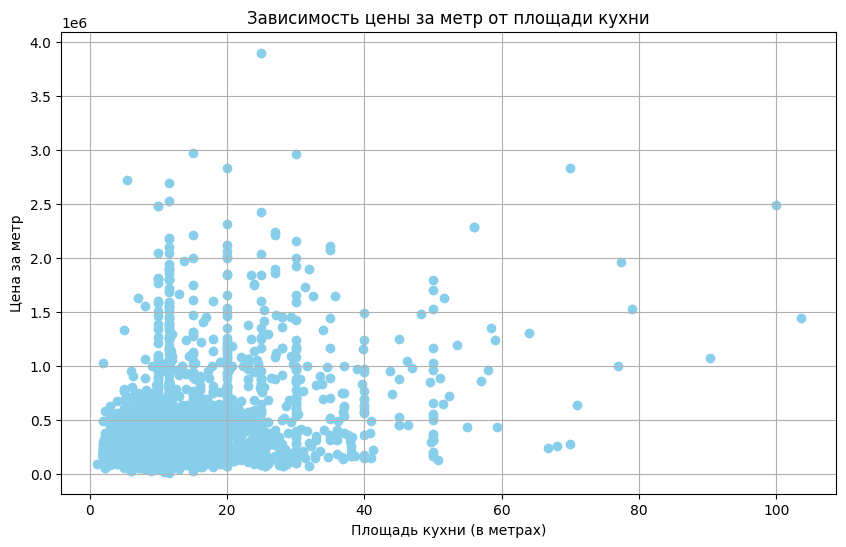

In [123]:
# Сортировка данных по цене за метр
df_sorted = df.sort_values(by='price_of_meter')

# Построение графика
plt.figure(figsize=(10, 6))
plt.scatter(df_sorted['kitchen_meters'], df_sorted['price_of_meter'], color='skyblue')

# Добавляем заголовки и метки
plt.title('Зависимость цены за метр от площади кухни')
plt.xlabel('Площадь кухни (в метрах)')
plt.ylabel('Цена за метр')

plt.grid()  # Выводим сетку для удобства
plt.show()

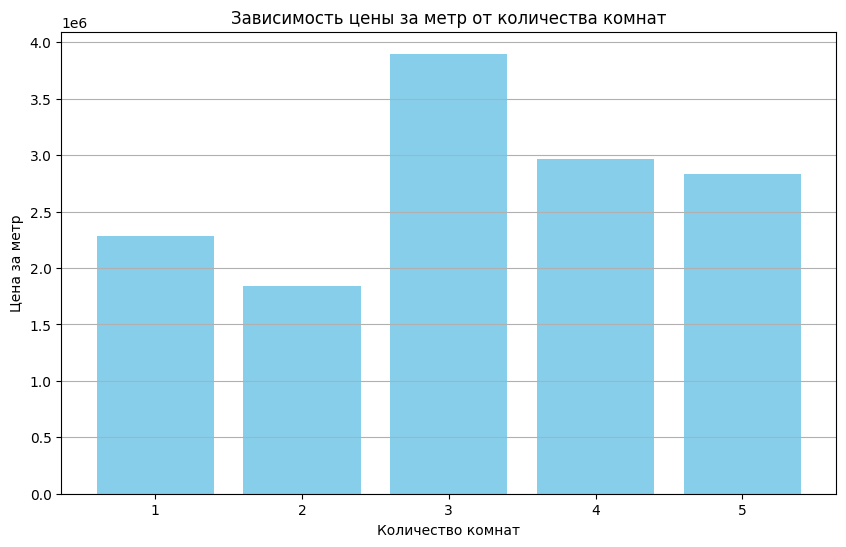

In [124]:
# Сортировка данных по цене за метр
df_sorted = df.sort_values(by='price_of_meter')

# Построение графика
plt.figure(figsize=(10, 6))
plt.bar(df_sorted['rooms_count'], df_sorted['price_of_meter'], color='skyblue')

# Добавляем заголовки и метки
plt.title('Зависимость цены за метр от количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Цена за метр')

plt.grid(axis='y')  # Добавляем сетку для удобства чтения по оси Y
plt.show()

Кодировка данных

In [125]:
#Напишем функцию, которая принимает на вход наши данные, кодирует числовыми значениями категориальные признаки
#и возвращает обновленный данные и сами кодировщики
def number_encode_features(init_df):
    result = init_df.copy() #копируем нашу исходную таблицу
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == 'object': #object -- строковый тип / если тип столбца - строка, то нужно его закодировать
            encoders[column] = preprocessing.LabelEncoder() #для колонки column создаем кодировщик
            result[column] = encoders[column].fit_transform(result[column]) #применяем кодировщик к столбцу и перезаписываем столбец
    return result, encoders

encoded_data, encoders = number_encode_features(df) #Теперь encoded data содержит закодированные категориальные признаки
encoded_data.head() #проверяем

,author,author_type,location,floor,floors_count,rooms_count,total_meters,price,year_of_construction,living_meters,kitchen_meters,phone,district,street,house_number,underground,price_of_meter
0,2712,3,31,5.0,7.0,1.0,34.6,9000000.0,1978.0,18.000000,8.000000,7.985041e+10,162,741,818,318,260115.606936
4,2425,4,31,1.0,16.0,1.0,37.7,9450000.0,1982.0,37.674197,11.592018,7.916094e+10,203,860,169,214,250663.129973
6,2896,3,31,13.0,17.0,1.0,37.6,11000000.0,2018.0,17.600000,15.000000,7.985243e+10,0,86,979,20,292553.191489
8,49,3,31,9.0,28.0,1.0,34.7,14500000.0,2023.0,9.100000,14.200000,7.915350e+10,17,1156,181,36,417867.435159
11,2993,3,31,5.0,9.0,1.0,34.1,10990000.0,1970.0,17.100000,8.100000,7.966109e+10,203,1362,493,214,322287.390029


<Axes: >

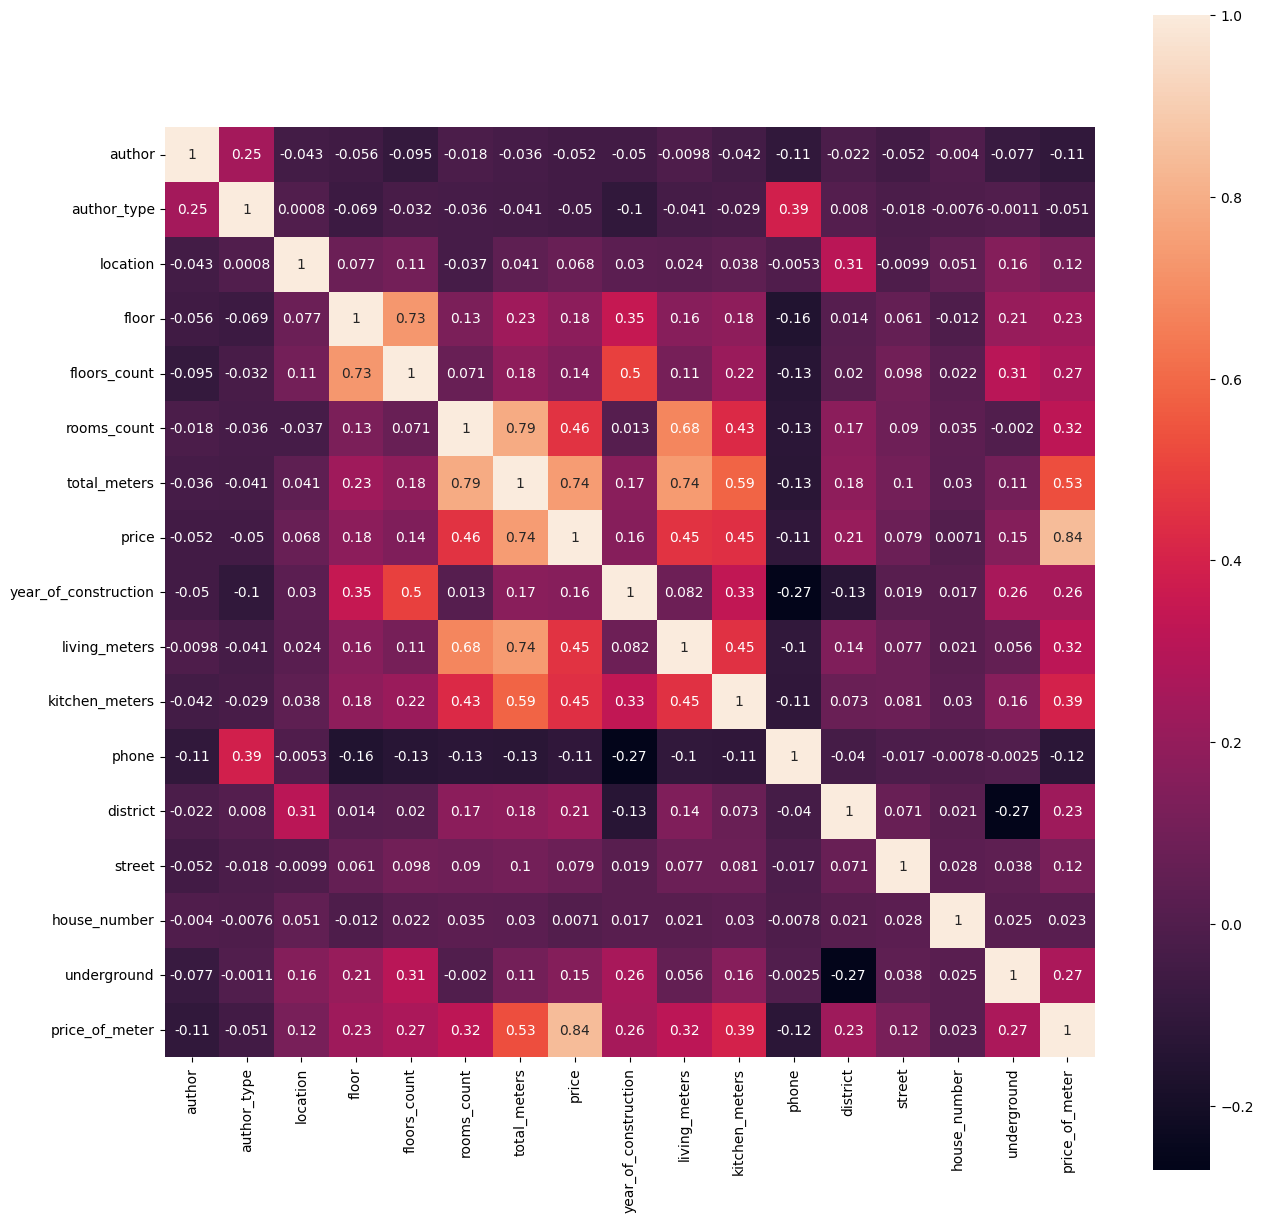

In [126]:
plt.figure(figsize = (15,15))
encoded_data, encoders = number_encode_features(df)
sns.heatmap(encoded_data.corr(), square=True, annot=True)

In [127]:
# Сохранение очищенных данных
df.to_csv("clean_main3.csv")